<a href="https://colab.research.google.com/github/DinhKhoi038/Baitap1/blob/main/Day3_2_Cooker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.8 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=67eea93aa6a880885387dcc8ad33b0fe35ee963725385f86f7d2cf3696d08dbc
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
pip install matplotlip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Nhập lượng gạo (từ 100 đến 1000 (đơn vị ml)) : 150
Nhập thời gian (từ 10 đến 120 (đơn vị phút)) : 30
Công suất cần thiết là:  719.4 W


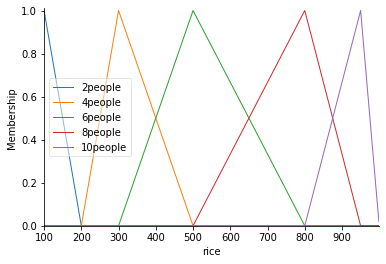

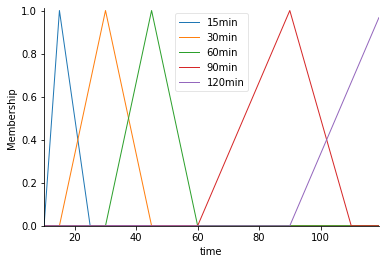

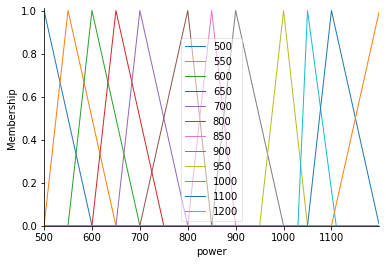

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

rice=ctrl.Antecedent(np.arange(100,1000,1),'rice')
time = ctrl.Antecedent(np.arange(10,120,1),'time')
power=ctrl.Consequent(np.arange(500,1200,1),'power')

#-------Chia khoang
#---Rice amount
rice['2people']=fuzz.trimf(rice.universe,[100,100,200])
rice['4people']=fuzz.trimf(rice.universe,[200,300,500])
rice['6people']=fuzz.trimf(rice.universe,[300,500,800])
rice['8people']=fuzz.trimf(rice.universe,[500,800,950])
rice['10people']=fuzz.trimf(rice.universe,[800,950,1000])


#---Time to cook
time['15min']=fuzz.trimf(time.universe,[10,15,25])
time['30min']=fuzz.trimf(time.universe,[15,30,45])
time['60min']=fuzz.trimf(time.universe,[30,45,60])
time['90min']=fuzz.trimf(time.universe,[60,90,110])
time['120min']=fuzz.trimf(time.universe,[90,120,120])

#powerouput
power['500']=fuzz.trimf(power.universe, [500, 500, 600])
power['550']=fuzz.trimf(power.universe, [500, 550, 650])
power['600']=fuzz.trimf(power.universe, [550,600,700])
power['650']=fuzz.trimf(power.universe, [600,650,750])
power['700']=fuzz.trimf(power.universe, [650,700,800])
power['800']=fuzz.trimf(power.universe, [700,800,850])
power['850']=fuzz.trimf(power.universe, [800,850,900])
power['900']=fuzz.trimf(power.universe, [850,900,1000])
power['950']=fuzz.trimf(power.universe, [950,1000,1050])
power['1000']=fuzz.trimf(power.universe, [1030,1050,1110])
power['1100']=fuzz.trimf(power.universe, [1050,1100,1200])
power['1200']=fuzz.trimf(power.universe, [1100,1200,1200])

#---------Rule
rule1 = ctrl.Rule(rice['2people']&time['15min'], power['800'])
rule2 = ctrl.Rule(rice['2people']&time['30min'], power['700'])
rule3 = ctrl.Rule(rice['2people']&time['60min'], power['600'])
rule4 = ctrl.Rule(rice['2people']&time['90min'], power['550'])
rule5 = ctrl.Rule(rice['2people']&time['120min'], power['500'])

rule6 = ctrl.Rule(rice['4people']&time['15min'], power['900'])
rule7 = ctrl.Rule(rice['4people']&time['30min'], power['800'])
rule8 = ctrl.Rule(rice['4people']&time['60min'], power['700'])
rule9 = ctrl.Rule(rice['4people']&time['90min'], power['650'])
rule10 = ctrl.Rule(rice['4people']&time['120min'], power['550'])

rule11 = ctrl.Rule(rice['6people']&time['15min'], power['1000'])
rule12 = ctrl.Rule(rice['6people']&time['30min'], power['950'])
rule13 = ctrl.Rule(rice['6people']&time['60min'], power['900'])
rule14 = ctrl.Rule(rice['6people']&time['90min'], power['800'])
rule15 = ctrl.Rule(rice['6people']&time['120min'], power['600'])

rule16 = ctrl.Rule(rice['8people']&time['15min'], power['1100'])
rule17 = ctrl.Rule(rice['8people']&time['30min'], power['1000'])
rule18 = ctrl.Rule(rice['8people']&time['60min'], power['950'])
rule19 = ctrl.Rule(rice['8people']&time['90min'], power['900'])
rule20 = ctrl.Rule(rice['8people']&time['120min'], power['850'])

rule21 = ctrl.Rule(rice['10people']&time['15min'], power['1200'])
rule22 = ctrl.Rule(rice['10people']&time['30min'], power['1100'])
rule23 = ctrl.Rule(rice['10people']&time['60min'], power['1000'])
rule24 = ctrl.Rule(rice['10people']&time['90min'], power['950'])
rule25 = ctrl.Rule(rice['10people']&time['120min'], power['900'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)

powering.input['rice']=float(input("Nhập lượng gạo (từ 100 đến 1000 (đơn vị ml)) : "))
powering.input['time']=float(input("Nhập thời gian (từ 10 đến 120 (đơn vị phút)) : "))
powering.compute()

print("Công suất cần thiết là: " ,round((powering.output['power']),1),"W")

rice.view()
time.view()
power.view()